In [31]:
import numpy as np
from skeleton import * 

In [32]:
h = int(10)
D = 2
N = 5

r0, v0 = init_rv_uniform(D,N) # generating initial conditions
R, V = gen_rv_matrices(D,N,h) # generating matrices for storage
R, V = store_rv(R,V,r0,v0,0) # storing initial condions in matrix

In [33]:
R.shape #(Tsteps, parts, dims)
print(R)

[[[0.60672846 0.10588726]
  [0.43321407 0.99797122]
  [0.46462401 0.06199034]
  [0.17998026 0.00378605]
  [0.05102365 0.35114874]]

 [[0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]]

 [[0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]]

 [[0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]]

 [[0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]]

 [[0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]]

 [[0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]]

 [[0.         0.        ]
  [0.         0.        ]
  [0.         0.        

In [34]:
(Tsteps, parts, dims) = R.shape

for dim in range(dims):
	coords = R[0,:, dim]
	print(coords)

[0.60672846 0.43321407 0.46462401 0.17998026 0.05102365]
[0.10588726 0.99797122 0.06199034 0.00378605 0.35114874]


In [35]:
r_x = R[0,:,0]
r_y = R[0,:,1]

In [36]:
#Box size L
L = 1

#Calling the image with smaller centre coordinate the minor image, we define
minor_im_coords = r_x - L
major_im_coords = r_x + L

print(minor_im_coords)
print(major_im_coords)

[-0.39327154 -0.56678593 -0.53537599 -0.82001974 -0.94897635]
[1.60672846 1.43321407 1.46462401 1.17998026 1.05102365]


In [37]:
# I wish to create an array of parts x 3:
possible_r_xj = np.column_stack((minor_im_coords, r_x, major_im_coords))

print(possible_r_xj)

[[-0.39327154  0.60672846  1.60672846]
 [-0.56678593  0.43321407  1.43321407]
 [-0.53537599  0.46462401  1.46462401]
 [-0.82001974  0.17998026  1.17998026]
 [-0.94897635  0.05102365  1.05102365]]


In [38]:
#We can now tile these possible coordinates parts times to find the closest image particles per particle.

tiled_poss_xj = np.tile(possible_r_xj, (parts, 1, 1))

print(tiled_poss_xj)

[[[-0.39327154  0.60672846  1.60672846]
  [-0.56678593  0.43321407  1.43321407]
  [-0.53537599  0.46462401  1.46462401]
  [-0.82001974  0.17998026  1.17998026]
  [-0.94897635  0.05102365  1.05102365]]

 [[-0.39327154  0.60672846  1.60672846]
  [-0.56678593  0.43321407  1.43321407]
  [-0.53537599  0.46462401  1.46462401]
  [-0.82001974  0.17998026  1.17998026]
  [-0.94897635  0.05102365  1.05102365]]

 [[-0.39327154  0.60672846  1.60672846]
  [-0.56678593  0.43321407  1.43321407]
  [-0.53537599  0.46462401  1.46462401]
  [-0.82001974  0.17998026  1.17998026]
  [-0.94897635  0.05102365  1.05102365]]

 [[-0.39327154  0.60672846  1.60672846]
  [-0.56678593  0.43321407  1.43321407]
  [-0.53537599  0.46462401  1.46462401]
  [-0.82001974  0.17998026  1.17998026]
  [-0.94897635  0.05102365  1.05102365]]

 [[-0.39327154  0.60672846  1.60672846]
  [-0.56678593  0.43321407  1.43321407]
  [-0.53537599  0.46462401  1.46462401]
  [-0.82001974  0.17998026  1.17998026]
  [-0.94897635  0.05102365  1.05

In [39]:
#If we now subtract from each tile in the tiled array the current position of the particle xi we can for every possible image calculate the difference in coordinates:

nax = np.newaxis

dim_diff = tiled_poss_xj - r_x[:, nax, nax]
print(dim_diff)

#Note the shifting row of -1, 0, 1 were a particle xi is looking at its own images xj thus giving integer L differences.

[[[-1.          0.          1.        ]
  [-1.17351438 -0.17351438  0.82648562]
  [-1.14210444 -0.14210444  0.85789556]
  [-1.4267482  -0.4267482   0.5732518 ]
  [-1.55570481 -0.55570481  0.44429519]]

 [[-0.82648562  0.17351438  1.17351438]
  [-1.          0.          1.        ]
  [-0.96859006  0.03140994  1.03140994]
  [-1.25323381 -0.25323381  0.74676619]
  [-1.38219042 -0.38219042  0.61780958]]

 [[-0.85789556  0.14210444  1.14210444]
  [-1.03140994 -0.03140994  0.96859006]
  [-1.          0.          1.        ]
  [-1.28464376 -0.28464376  0.71535624]
  [-1.41360036 -0.41360036  0.58639964]]

 [[-0.5732518   0.4267482   1.4267482 ]
  [-0.74676619  0.25323381  1.25323381]
  [-0.71535624  0.28464376  1.28464376]
  [-1.          0.          1.        ]
  [-1.12895661 -0.12895661  0.87104339]]

 [[-0.44429519  0.55570481  1.55570481]
  [-0.61780958  0.38219042  1.38219042]
  [-0.58639964  0.41360036  1.41360036]
  [-0.87104339  0.12895661  1.12895661]
  [-1.          0.          1.  

In [40]:
#We can now compute the smallest squared distance

dim_dist = dim_diff**2
print(dim_dist)

[[[1.00000000e+00 0.00000000e+00 1.00000000e+00]
  [1.37713601e+00 3.01072417e-02 6.83078472e-01]
  [1.30440256e+00 2.01936723e-02 7.35984789e-01]
  [2.03561042e+00 1.82114023e-01 3.28617630e-01]
  [2.42021744e+00 3.08807830e-01 1.97398220e-01]]

 [[6.83078472e-01 3.01072417e-02 1.37713601e+00]
  [1.00000000e+00 0.00000000e+00 1.00000000e+00]
  [9.38166698e-01 9.86584534e-04 1.06380647e+00]
  [1.57059499e+00 6.41273635e-02 5.57659740e-01]
  [1.91045036e+00 1.46069517e-01 3.81688677e-01]]

 [[7.35984789e-01 2.01936723e-02 1.30440256e+00]
  [1.06380647e+00 9.86584534e-04 9.38166698e-01]
  [1.00000000e+00 0.00000000e+00 1.00000000e+00]
  [1.65030958e+00 8.10220673e-02 5.11734557e-01]
  [1.99826599e+00 1.71065261e-01 3.43864534e-01]]

 [[3.28617630e-01 1.82114023e-01 2.03561042e+00]
  [5.57659740e-01 6.41273635e-02 1.57059499e+00]
  [5.11734557e-01 8.10220673e-02 1.65030958e+00]
  [1.00000000e+00 0.00000000e+00 1.00000000e+00]
  [1.27454302e+00 1.66298068e-02 7.58716590e-01]]

 [[1.9739822

In [41]:
#Finding the smalles difference between any xi and all xj

min_dist = np.min(dim_dist, axis=2)
print(min_dist)

[[0.         0.03010724 0.02019367 0.18211402 0.19739822]
 [0.03010724 0.         0.00098658 0.06412736 0.14606952]
 [0.02019367 0.00098658 0.         0.08102207 0.17106526]
 [0.18211402 0.06412736 0.08102207 0.         0.01662981]
 [0.19739822 0.14606952 0.17106526 0.01662981 0.        ]]


In [42]:
#We can now create a mask that selects the smallest distances from our array
mask = np.equal(dim_dist, min_dist[:,:,np.newaxis])
print(mask)


[[[False  True False]
  [False  True False]
  [False  True False]
  [False  True False]
  [False False  True]]

 [[False  True False]
  [False  True False]
  [False  True False]
  [False  True False]
  [False  True False]]

 [[False  True False]
  [False  True False]
  [False  True False]
  [False  True False]
  [False  True False]]

 [[False  True False]
  [False  True False]
  [False  True False]
  [False  True False]
  [False  True False]]

 [[ True False False]
  [False  True False]
  [False  True False]
  [False  True False]
  [False  True False]]]


In [43]:
#Use the mask to select the coordinates xj that result in the smallest distance to any xi

xj_closest = tiled_poss_xj[mask]
print(xj_closest)

print(xj_closest.shape) #parts**2
#The first five numbers are the xj positions of the 5 closest image particles to x0
#The next five numbers are the x positions of the 5 closest image particles to x1
#etc

[ 0.60672846  0.43321407  0.46462401  0.17998026  1.05102365  0.60672846
  0.43321407  0.46462401  0.17998026  0.05102365  0.60672846  0.43321407
  0.46462401  0.17998026  0.05102365  0.60672846  0.43321407  0.46462401
  0.17998026  0.05102365 -0.39327154  0.43321407  0.46462401  0.17998026
  0.05102365]
(25,)


In [44]:
#After reshaping
xj_closest_xi = xj_closest.reshape((parts, parts))
print(xj_closest_xi)

#We can index the result as for particle xi find the closest 5 xj by
# xj_closest_xi[xi,:]

[[ 0.60672846  0.43321407  0.46462401  0.17998026  1.05102365]
 [ 0.60672846  0.43321407  0.46462401  0.17998026  0.05102365]
 [ 0.60672846  0.43321407  0.46462401  0.17998026  0.05102365]
 [ 0.60672846  0.43321407  0.46462401  0.17998026  0.05102365]
 [-0.39327154  0.43321407  0.46462401  0.17998026  0.05102365]]


In [45]:
import matplotlib.pyplot as plt

import numpy as np
from vrmatrices import *
from sim_toolkit import closest_images



In [46]:
h = int(10)
D = 2
N = 4
L = 1

r0, v0 = init_rv_uniform(D,N) # generating initial conditions
R, V = gen_rv_matrices(D,N,h) # generating matrices for storage
R, V = store_rv(R,V,r0,v0,0) # storing initial condions in matrix

In [47]:
r0 = R[0,:,:]
print(r0)

[[0.73281982 0.7989766 ]
 [0.31582875 0.57436969]
 [0.11770846 0.91190748]
 [0.20463689 0.79978094]]


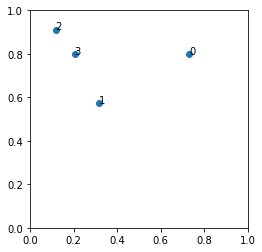

In [48]:
#Simply showing the centre box with particles:

(num_parts, dims) = r0.shape

plt.scatter(r0[:,0], r0[:,1])
for i in range(num_parts):
	plt.text(r0[i,0], r0[i,1], str(i))
plt.xlim([0,L])
plt.ylim([0,L])
plt.gca().set_aspect('equal')
plt.show()

In [49]:
def add_imaged_parts(r0):
	(num_parts, dims) = r0.shape
	r0_x, r0_y = r0[:,0], r0[:,1]

	image_coords = np.zeros((num_parts*3**dims, dims))

	any_x = np.concatenate((r0_x - L, r0_x, r0_x + L))
	all_x = np.concatenate((any_x, any_x, any_x))

	any_y = np.concatenate((r0_y,r0_y,r0_y))
	all_y = np.concatenate((any_y-L, any_y, any_y+L))

	image_coords[:,0] = all_x
	image_coords[:,1] = all_y

	return image_coords

	

In [50]:
images = add_imaged_parts(r0)

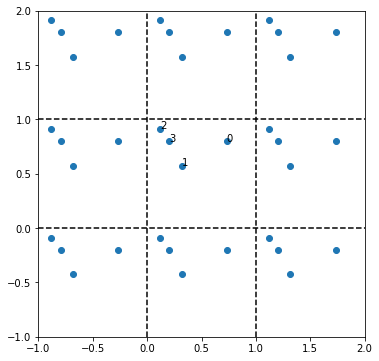

In [51]:
plt.scatter(images[:,0], images[:,1])
for i in range(num_parts):
	plt.text(r0[i,0], r0[i,1], str(i))
plt.xlim([-L,2*L])
plt.ylim([-L,2*L])
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(6,6)
plt.axvline(x=L, linestyle='--', color='black')
plt.axvline(x=0, linestyle='--', color='black')
plt.axhline(y=L, linestyle='--', color='black')
plt.axhline(y=0, linestyle='--', color='black')
plt.show()

In [52]:
#moment of truth

lookup_arr = closest_images(r0,L)
print(lookup_arr)

[[[ 0.73281982  0.31582875  1.11770846  1.20463689]
  [ 0.73281982  0.31582875  0.11770846  0.20463689]
  [-0.26718018  0.31582875  0.11770846  0.20463689]
  [-0.26718018  0.31582875  0.11770846  0.20463689]]

 [[ 0.7989766   0.57436969  0.91190748  0.79978094]
  [ 0.7989766   0.57436969  0.91190748  0.79978094]
  [ 0.7989766   0.57436969  0.91190748  0.79978094]
  [ 0.7989766   0.57436969  0.91190748  0.79978094]]]


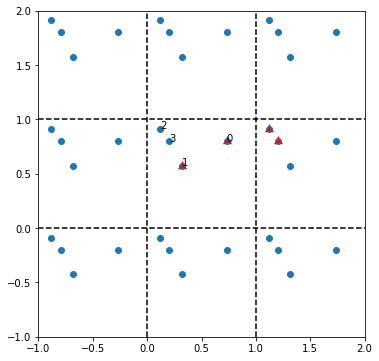

In [53]:
#So for the x coordinates of all particles closest to part0 should be indexed as:
close_neigh_x = lookup_arr[0, 0, :]
close_neigh_y = lookup_arr[1, 0, :]

plt.scatter(images[:,0], images[:,1])
for i in range(num_parts):
	plt.text(r0[i,0], r0[i,1], str(i))
plt.xlim([-L,2*L])
plt.ylim([-L,2*L])
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(6,6)
plt.axvline(x=L, linestyle='--', color='black')
plt.axvline(x=0, linestyle='--', color='black')
plt.axhline(y=L, linestyle='--', color='black')
plt.axhline(y=0, linestyle='--', color='black')

plt.scatter(close_neigh_x, close_neigh_y, marker='2', color="red", s=100)
plt.show()

In [54]:
#As you can see for particle 0 it chooses the y-major image of 3 instead of the normal particle 3

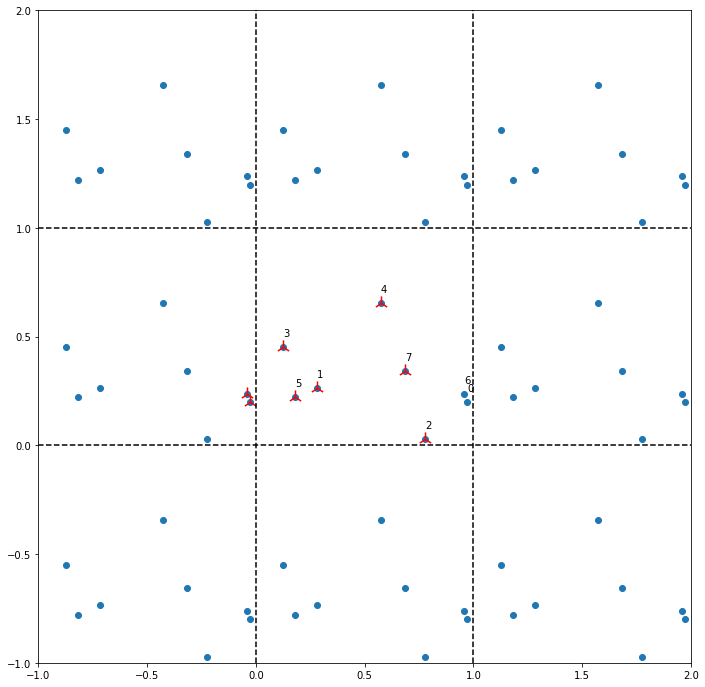

In [58]:
h = int(10)
D = 2
N = 8 
L = 1

r0, v0 = init_rv_uniform(D,N) # generating initial conditions
R, V = gen_rv_matrices(D,N,h) # generating matrices for storage
R, V = store_rv(R,V,r0,v0,0) # storing initial condions in matrix

r0 = R[0,:,:]

images = add_imaged_parts(r0)

plt.scatter(images[:,0], images[:,1])
for i in range(N):
	plt.text(r0[i,0], r0[i,1]+0.05, str(i))
plt.xlim([-L,2*L])
plt.ylim([-L,2*L])
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(12,12)
plt.axvline(x=L, linestyle='--', color='black')
plt.axvline(x=0, linestyle='--', color='black')
plt.axhline(y=L, linestyle='--', color='black')
plt.axhline(y=0, linestyle='--', color='black')

lookup_arr = closest_images(r0,L)
close_neigh_x = lookup_arr[0, 1, :]
close_neigh_y = lookup_arr[1, 1, :]


plt.scatter(close_neigh_x, close_neigh_y, marker='2', color="red", s=200)
#plt.savefig("figs/closest_image_convention.png")
plt.show()

In [59]:
from time import time_ns

In [27]:
Ns = [i for i in range(14)]
Ts = []

for i in Ns:
	h = int(10)
	D = 3
	N = 2**i
	L = 1

	r0, v0 = init_rv_uniform(D,N) # generating initial conditions
	R, V = gen_rv_matrices(D,N,h) # generating matrices for storage
	R, V = store_rv(R,V,r0,v0,0) # storing initial condions in matrix

	r0 = R[0,:,:]
	start = time_ns()
	lookup_arr = closest_images(r0,L)
	time = time_ns() -start

	Ts.append(time)

Ns = np.asarray(Ns)
Ts = np.asarray(Ts)


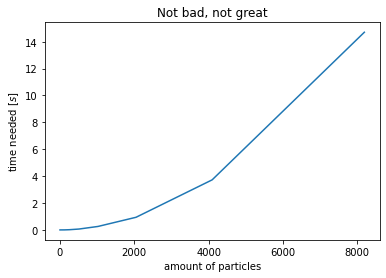

In [28]:
plt.plot(2**Ns, Ts/1e9, label='time needed ms')
plt.xlabel('amount of particles')
plt.ylabel(r"time needed [$s$]")
plt.title("Not bad, not great")
plt.show()

In [29]:
h = int(10)
D = 3
N = 200 
L = 1

r0, v0 = init_rv_uniform(D,N) # generating initial conditions
R, V = gen_rv_matrices(D,N,h) # generating matrices for storage
R, V = store_rv(R,V,r0,v0,0) # storing initial condions in matrix

r0 = R[0,:,:]

lookup_arr = closest_images(r0,L)

In [30]:
lookup_arr.shape

(3, 200, 200)

array([[0.89012923, 0.72403119, 0.49355968, 1.30389261, 1.38385343,
        0.99569381, 1.294204  , 1.25417679, 0.53215009, 0.89115412,
        0.50881767, 0.58366112, 1.00672339, 1.00499326, 0.79041368,
        0.80069346, 0.93602387, 0.56966338, 0.86344579, 0.51664944,
        0.70789078, 0.90956145, 0.7666711 , 0.44704452, 0.91586886,
        0.94367775, 1.07441765, 1.2177322 , 1.08322165, 0.94476512,
        1.008417  , 0.79281798, 1.27235301, 0.81594919, 1.06580474,
        1.06326726, 1.07658231, 0.45428307, 1.03352029, 0.56930061,
        1.28714509, 1.00060025, 1.03923843, 0.44080763, 0.90365926,
        0.54574313, 1.18677897, 1.11603874, 0.55702733, 0.81642135,
        1.31575822, 0.50385104, 0.67610868, 0.99850184, 0.70062517,
        0.83528286, 0.50106402, 0.52496404, 1.05397069, 1.30990733,
        0.53506306, 1.37908193, 1.05409295, 1.13261964, 0.74805834,
        0.59456678, 0.41130704, 0.79217092, 0.86326106, 0.61698839,
        0.59100008, 0.81419975, 0.44416647, 1.22